In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [23]:
data = pd.read_csv("C:/Users/Akif/Desktop/football/data.csv")
data.shape

(1472, 16)

In [24]:
num_unique_values = data['result'].nunique()

print(f"The number of different values in the column 'result' is: {num_unique_values}")

The number of different values in the column 'result' is: 3


In [25]:
value_counts = data['result'].value_counts()

print("Count of each unique value in the column:")
print(value_counts)

Count of each unique value in the column:
1    655
2    447
0    370
Name: result, dtype: int64


In [26]:
target_columns = ['result']
feature_columns = ['own_goals', 'own_position', 'opponent_goals', 'opponent_position', 'home_total_market_value', 'home_key_players', 'away_total_market_value', 'away_key_players', 'home_position_to_goal', 'away_position_to_goal', 'home_win_h2h', 'home_home_win', 'away_away_win', 'home_last_5_game_win', 'away_last_5_game_win']

In [27]:
X = data[feature_columns].values
y = data[target_columns].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 941
Validation set size: 236
Testing set size: 295


In [28]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
15/15 - 10s - loss: 1.9500 - accuracy: 0.3326 - val_loss: 1.1921 - val_accuracy: 0.2542 - 10s/epoch - 661ms/step
Epoch 2/50
15/15 - 0s - loss: 1.9278 - accuracy: 0.3284 - val_loss: 1.1737 - val_accuracy: 0.2331 - 413ms/epoch - 28ms/step
Epoch 3/50
15/15 - 0s - loss: 2.0346 - accuracy: 0.3039 - val_loss: 1.1610 - val_accuracy: 0.2669 - 405ms/epoch - 27ms/step
Epoch 4/50
15/15 - 0s - loss: 2.0705 - accuracy: 0.3092 - val_loss: 1.1520 - val_accuracy: 0.2881 - 343ms/epoch - 23ms/step
Epoch 5/50
15/15 - 0s - loss: 1.9851 - accuracy: 0.3337 - val_loss: 1.1454 - val_accuracy: 0.3178 - 390ms/epoch - 26ms/step
Epoch 6/50
15/15 - 0s - loss: 1.9636 - accuracy: 0.3199 - val_loss: 1.1390 - val_accuracy: 0.3136 - 395ms/epoch - 26ms/step
Epoch 7/50
15/15 - 0s - loss: 2.0170 - accuracy: 0.3114 - val_loss: 1.1356 - val_accuracy: 0.3390 - 391ms/epoch - 26ms/step
Epoch 8/50
15/15 - 0s - loss: 1.9448 - accuracy: 0.3379 - val_loss: 1.1337 - val_accuracy: 0.3390 - 361ms/epoch - 24ms/step
Epoch 9/

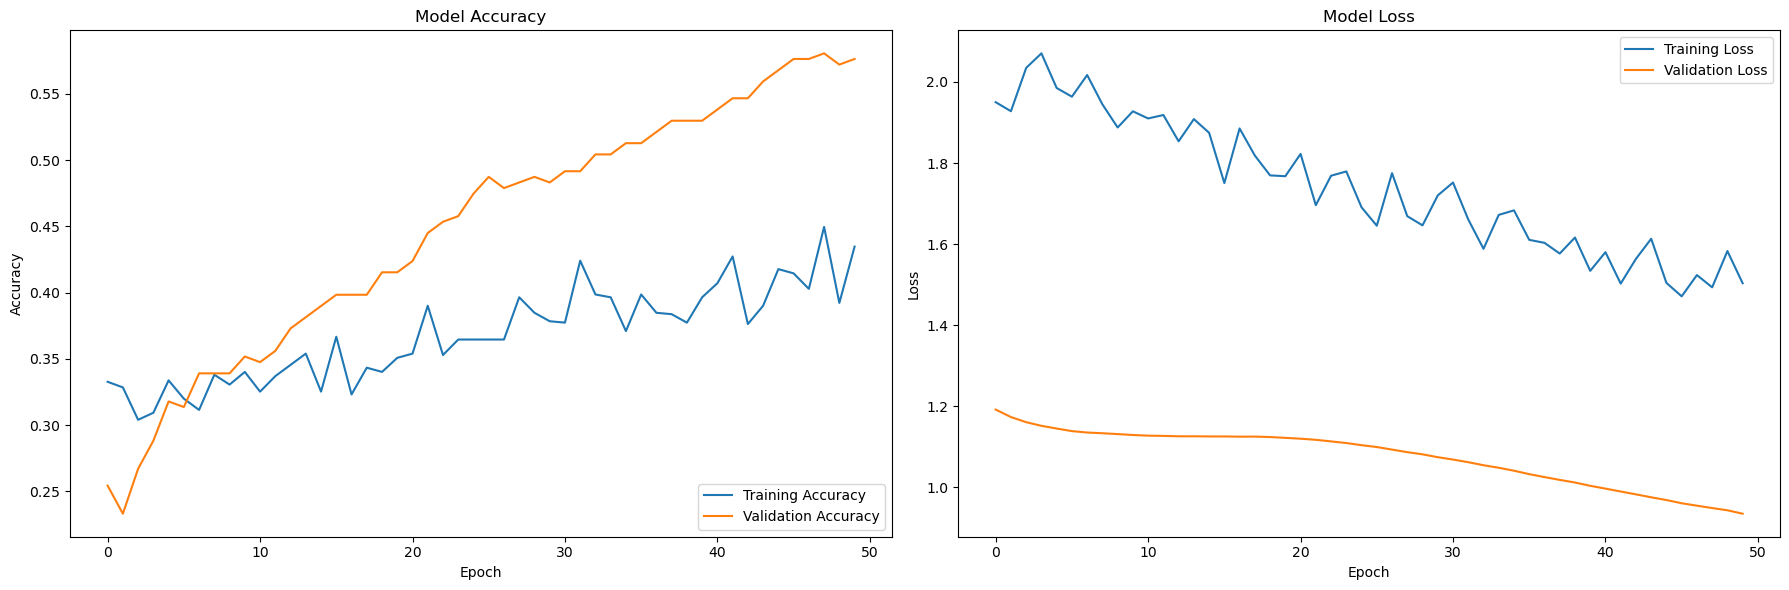

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')


axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')


plt.tight_layout()
plt.show()

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 9ms/step - loss: 0.8726 - accuracy: 0.6136
Test Loss: 0.8726358413696289
Test Accuracy: 0.6135593056678772


10/10 [==============================] - 1s 9ms/step


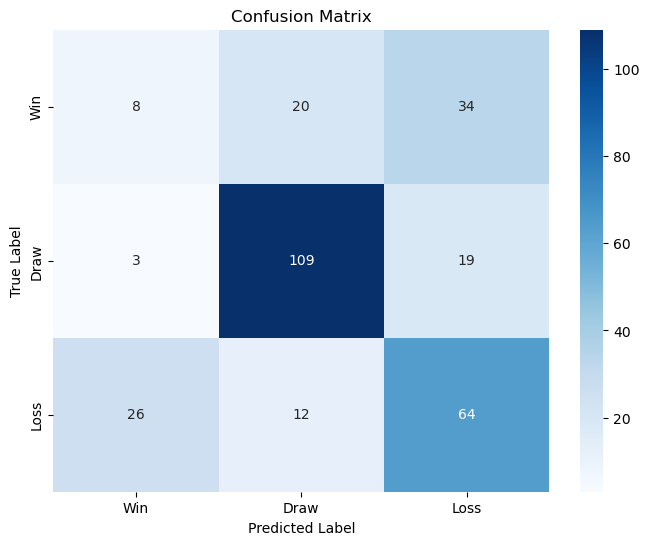

In [32]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ['Win', 'Draw', 'Loss']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()